In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [5]:
print(df.isnull().sum())
print("__________Duplicates__________")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Removed Duplicates :")
print(df.duplicated().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
__________Duplicates__________
0
Removed Duplicates :
0


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

In [7]:
# Add new columns year, month and day
df["Year"] = df["Order Date"].dt.year

# add new column month
df["Month"] = df["Order Date"].dt.month_name()

# add new column day
df["Day"] = df["Order Date"].dt.day_name()

In [8]:
# We can drop some columns we don't use in analysis
df.drop(columns = ["Customer ID", "Product ID", "Row ID"], inplace = True)

In [9]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November,Saturday
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November,Saturday
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June,Thursday
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October,Thursday
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October,Thursday


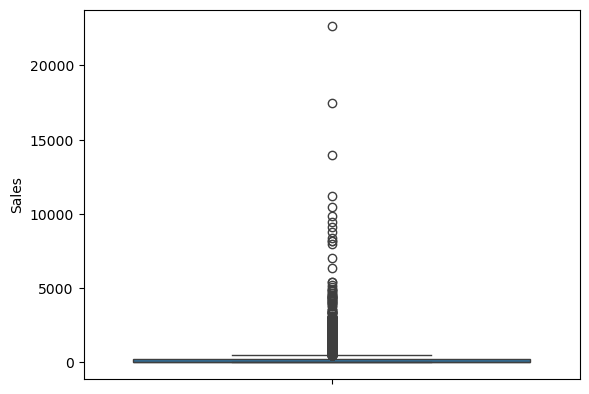

In [10]:
sns.boxplot(y = "Sales", data = df)
plt.show()

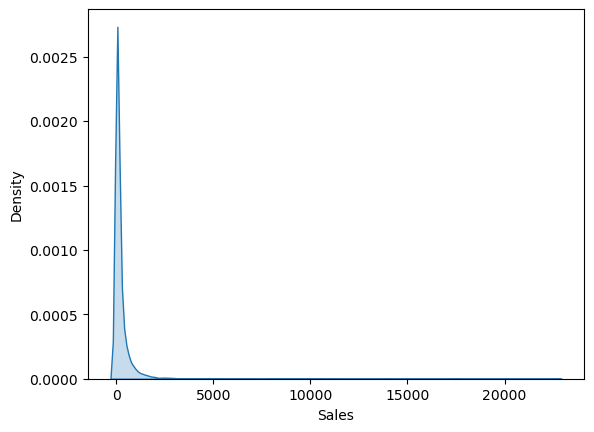

In [11]:
sns.kdeplot(x = df["Sales"], fill = True)
plt.show()

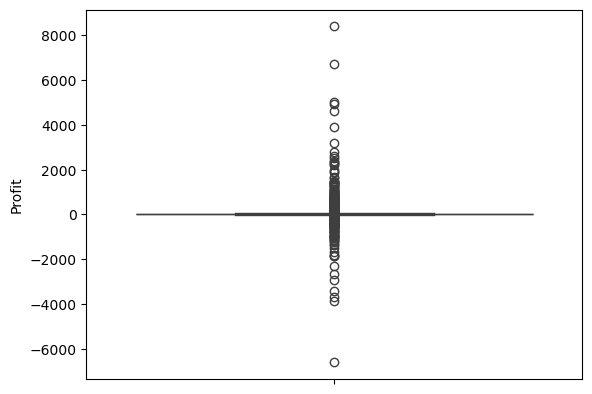

In [12]:
sns.boxplot(y = "Profit", data = df)
plt.show()

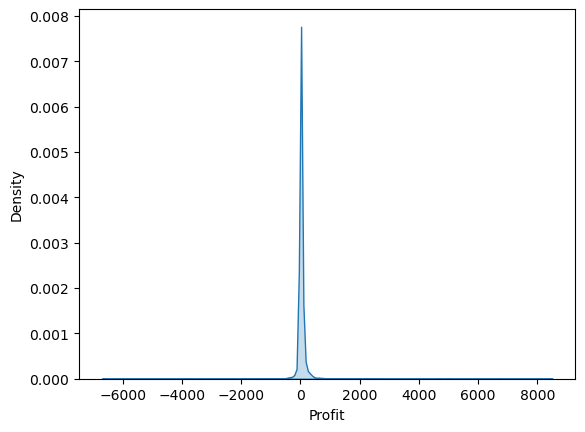

In [13]:
sns.kdeplot(x = df["Profit"], fill = True)
plt.show()

In [14]:
us_state_to_abbrev = {
    "Alabama": "US-AL",
    "Alaska": "US-AK",
    "Arizona": "US-AZ",
    "Arkansas": "US-AR",
    "California": "US-CA",
    "Colorado": "US-CO",
    "Connecticut": "US-CT",
    "Delaware": "US-DE",
    "Florida": "US-FL",
    "Georgia": "US-GA",
    "Hawaii": "US-HI",
    "Idaho": "US-ID",
    "Illinois": "US-IL",
    "Indiana": "US-IN",
    "Iowa": "US-IA",
    "Kansas": "US-KS",
    "Kentucky": "US-KY",
    "Louisiana": "US-LA",
    "Maine": "US-ME",
    "Maryland": "US-MD",
    "Massachusetts": "US-MA",
    "Michigan": "US-MI",
    "Minnesota": "US-MN",
    "Mississippi": "US-MS",
    "Missouri": "US-MO",
    "Montana": "US-MT",
    "Nebraska": "US-NE",
    "Nevada": "US-NV",
    "New Hampshire": "US-NH",
    "New Jersey": "US-NJ",
    "New Mexico": "US-NM",
    "New York": "US-NY",
    "North Carolina": "US-NC",
    "North Dakota": "US-ND",
    "Ohio": "US-OH",
    "Oklahoma": "US-OK",
    "Oregon": "US-OR",
    "Pennsylvania": "US-PA",
    "Rhode Island": "US-RI",
    "South Carolina": "US-SC",
    "South Dakota": "US-SD",
    "Tennessee": "US-TN",
    "Texas": "US-TX",
    "Utah": "US-UT",
    "Vermont": "US-VT",
    "Virginia": "US-VA",
    "Washington": "US-WA",
    "West Virginia": "US-WV",
    "Wisconsin": "US-WI",
    "Wyoming": "US-WY",
    "District of Columbia": "US-DC",
    "American Samoa": "US-AS",
    "Guam": "US-GU",
    "Northern Mariana Islands": "US-MP",
    "Puerto Rico": "US-PR",
    "United States Minor Outlying Islands": "US-UM",
    "U.S. Virgin Islands": "US-VI",
}

In [ ]:
df['State_abb'] = df['State'].replace(us_state_to_abbrev)

In [16]:
df.to_excel('../data/Superstore_cleaned.xlsx', index=False)